In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
!kaggle datasets download -d residentmario/iowa-liquor-sales

Dataset URL: https://www.kaggle.com/datasets/residentmario/iowa-liquor-sales
License(s): CC0-1.0
iowa-liquor-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# read the dataset using the compression zip
df = pd.read_csv('iowa-liquor-sales.zip',compression='zip')
df.head()

C:\Users\arham\AppData\Local\Temp\ipykernel_22008\3820681408.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iowa-liquor-sales.zip',compression='zip')


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [4]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,1.259108e+07,1.251190e+07,1.258306e+07,1.259107e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07
mean,3.565216e+03,5.724050e+01,1.044710e+06,2.574911e+02,4.603682e+04,1.222533e+01,9.289402e+02,8.140392e+00,7.489119e+00,1.977358e+00
std,9.312721e+02,2.726983e+01,5.435094e+04,1.416175e+02,5.301684e+04,7.458673e+00,7.340448e+02,2.217891e+01,2.679149e+01,7.077822e+00
min,2.106000e+03,1.000000e+00,1.012200e+05,1.000000e+01,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,3.100000e+01,1.012210e+06,1.150000e+02,2.705600e+04,6.000000e+00,7.500000e+02,2.000000e+00,1.500000e+00,4.000000e-01
50%,3.704000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,4.000000e+00,3.000000e+00,7.900000e-01
75%,4.304000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.375500e+04,1.200000e+01,1.000000e+03,1.200000e+01,9.000000e+00,2.380000e+00
max,9.932000e+03,9.900000e+01,1.901200e+06,9.870000e+02,9.992750e+05,6.000000e+02,3.780000e+05,1.500000e+04,1.500000e+04,3.962580e+03


In [5]:
columns = df.columns.tolist()
columns

['Invoice/Item Number',
 'Date',
 'Store Number',
 'Store Name',
 'Address',
 'City',
 'Zip Code',
 'Store Location',
 'County Number',
 'County',
 'Category',
 'Category Name',
 'Vendor Number',
 'Vendor Name',
 'Item Number',
 'Item Description',
 'Pack',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

In [7]:
#Converting it to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df = df[df['Date'].dt.year >= 2017]
df

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\arham\AppData\Local\Temp\ipykernel_22008\3057597126.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\arham\AppData\Local\Temp\ipykernel_22008\3057597126.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\arham\AppData\Local\Temp\ipykernel_22008\3057597126.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
10635601,INV-02499700024,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,19068,Jim Beam,6,1750,20.99,31.49,1,188.94,1.75,0.46
10635618,INV-02499700025,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,19064,Jim Beam,24,375,5.25,7.88,1,189.12,0.37,0.09
10635910,INV-02499700026,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,25877,Sunny Brook Blend Whiskey,12,1000,4.72,7.08,2,6.68,2.00,0.52
10636088,INV-02499700027,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,25878,Sunny Brook Blend Whiskey,6,1750,7.87,11.81,1,70.86,1.75,0.46
10636142,INV-02499700028,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,23824,Five Star,24,375,2.00,3.00,5,3.00,1.87,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,INV-08368000074,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,73802,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63
12591073,INV-08368000075,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20375,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39
12591074,INV-08368000076,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20372,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39
12591075,INV-08368000077,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20369,Old Forester 1870 Whisky Row Series,6,750,22.49,33.74,2,33.74,1.50,0.39


In [8]:
df.isnull().sum()

Invoice/Item Number         0
Date                        0
Store Number                0
Store Name                  0
Address                  1411
City                     1410
Zip Code                 1410
Store Location           1410
County Number            1410
County                   1410
Category                 5835
Category Name            5835
Vendor Number               1
Vendor Name                 1
Item Number                 0
Item Description            0
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [9]:
missing_percentage_of_data = (df.isnull().sum() / len(df)) * 100
missing_percentage_of_data

Invoice/Item Number      0.000000
Date                     0.000000
Store Number             0.000000
Store Name               0.000000
Address                  0.074930
City                     0.074877
Zip Code                 0.074877
Store Location           0.074877
County Number            0.074877
County                   0.074877
Category                 0.309862
Category Name            0.309862
Vendor Number            0.000053
Vendor Name              0.000053
Item Number              0.000000
Item Description         0.000000
Pack                     0.000000
Bottle Volume (ml)       0.000000
State Bottle Cost        0.000000
State Bottle Retail      0.000000
Bottles Sold             0.000000
Sale (Dollars)           0.000000
Volume Sold (Liters)     0.000000
Volume Sold (Gallons)    0.000000
dtype: float64

In [10]:
df["Category Name"].unique()

array(['Straight Bourbon Whiskies', 'Blended Whiskies', 'American Vodka',
       'Neutral Grain Spirits', 'American Flavored Vodka',
       'Canadian Whiskies', 'American Dry Gins', 'Imported Vodka',
       'Scotch Whiskies', 'American Brandies', 'Cocktails / RTD',
       'Whiskey Liqueur', 'Imported Schnapps',
       'American Cordials & Liqueurs', 'Temporary & Specialty Packages',
       'American Distilled Spirits Specialty', 'American Schnapps',
       'Imported Dry Gins', 'Imported Cordials & Liqueurs',
       'Cream Liqueurs', 'White Rum', 'Spiced Rum',
       'Imported Flavored Vodka', 'Imported Brandies',
       '100% Agave Tequila', 'Gold Rum', 'Irish Whiskies', 'Flavored Rum',
       'Mixto Tequila', 'Triple Sec', 'Tennessee Whiskies',
       'Imported Distilled Spirits Specialty', 'Straight Rye Whiskies',
       'Coffee Liqueurs', 'Aged Dark Rum',
       'Neutral Grain Spirits Flavored', 'American Vodkas',
       'American Sloe Gins', 'Flavored Gin', 'Single Malt Scotch',
  

In [11]:
df["County"].unique()

array([nan, 'POTTAWATTA', 'HOWARD', 'POLK', 'WARREN', 'DUBUQUE', 'Polk',
       'MONTGOMERY', 'LINN', 'Linn', 'JOHNSON', 'MARION', 'JONES',
       'DALLAS', 'STORY', 'SAC', 'WASHINGTON', 'JEFFERSON', 'LEE',
       'DES MOINES', 'Henry', 'BLACK HAWK', 'BREMER', 'BUCHANAN',
       'DELAWARE', 'WEBSTER', 'CALHOUN', 'IDA', 'CRAWFORD', 'MONONA',
       'WOODBURY', 'PLYMOUTH', 'CHEROKEE', 'BUENA VIST', 'BOONE',
       'Black Hawk', 'JACKSON', 'MUSCATINE', 'Marion', 'LUCAS', 'WAYNE',
       'APPANOOSE', 'DAVIS', 'MONROE', 'CLAY', 'POCAHONTAS', 'DICKINSON',
       'Dickinson', 'EMMET', 'CEDAR', 'PALO ALTO', 'CLINTON', 'Kossuth',
       'SCOTT', 'Hardin', 'Iowa', 'HUMBOLDT', 'WINNEBAGO', 'WAPELLO',
       'MAHASKA', 'Buchanan', 'Wapello', 'MARSHALL', 'TAMA', 'BENTON',
       'IOWA', 'POWESHIEK', 'Poweshiek', 'Scott', 'CERRO GORD', 'WORTH',
       'Cerro Gord', 'JASPER', 'Webster', 'Dallas', 'GREENE', 'CARROLL',
       'Boone', 'KOSSUTH', 'HARDIN', 'BUTLER', 'TAYLOR', 'CLARKE',
       'DECATUR',

In [12]:
df["County Number"].unique()

array([nan, 78., 45., 77., 91., 31., 69., 57., 52., 63., 53., 25., 85.,
       81., 92., 51., 56., 29., 44.,  7.,  9., 10., 28., 94., 13., 47.,
       24., 67., 97., 75., 18., 11.,  8., 49., 70., 59., 93.,  4., 26.,
       68., 21., 76., 30., 32., 16., 74., 23., 55., 82., 42., 48., 46.,
       95., 90., 62., 64., 86.,  6., 79., 17., 98., 50., 37., 14., 12.,
       87., 20., 27., 38., 35., 80., 73., 65., 22.,  2., 88., 61., 96.,
        3., 33., 40., 99.,  1., 41., 19., 66., 34., 89., 54., 58., 71.,
       72., 60., 84., 39., 15., 43., 83.,  5., 36.])

In [13]:
df_cleaned = df.dropna(subset=['Address', 'City', 'Zip Code', 'Store Location', 'Category', 'Vendor Number', 'Vendor Name', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)'])

In [14]:
missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
missing_percentage_of_new_data

Invoice/Item Number      0.0
Date                     0.0
Store Number             0.0
Store Name               0.0
Address                  0.0
City                     0.0
Zip Code                 0.0
Store Location           0.0
County Number            0.0
County                   0.0
Category                 0.0
Category Name            0.0
Vendor Number            0.0
Vendor Name              0.0
Item Number              0.0
Item Description         0.0
Pack                     0.0
Bottle Volume (ml)       0.0
State Bottle Cost        0.0
State Bottle Retail      0.0
Bottles Sold             0.0
Sale (Dollars)           0.0
Volume Sold (Liters)     0.0
Volume Sold (Gallons)    0.0
dtype: float64

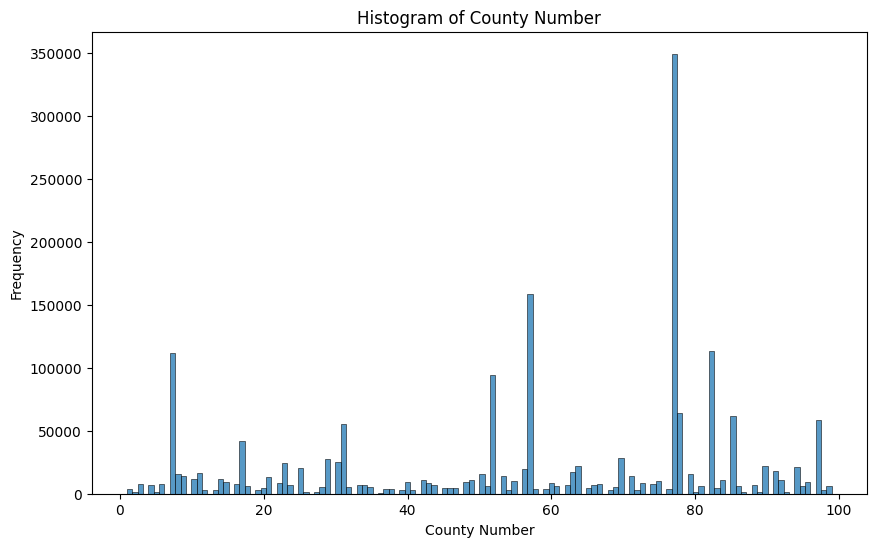

In [15]:
#Check the spread of the "County Number" column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['County Number'])
plt.title(f'Histogram of {'County Number'}')
plt.xlabel("County Number")
plt.ylabel('Frequency')
plt.show()

In [16]:
# Check if missing category names have category numbers available
df_cleaned[df_cleaned['Category Name'].isna()][['Category Name','Category']]['Category'].unique()

array([], dtype=float64)

In [17]:
# Check if there is a pattern of missing values in the Category Name column
for cat in df_cleaned[df_cleaned['Category Name'].isna()][['Category Name','Category']]['Category'].unique():
    print(cat,":\n ",df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index())

In [18]:
df_by_category = df_cleaned.set_index('Category')
df_by_category

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Category,,,,,,,,,,,,,,,,,,,,,
1012200.0,INV-02499500001,2017-01-03,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,78.0,POTTAWATTA,...,8208,House Of Stuart,6,1750,10.52,15.78,3,15.78,5.25,1.38
1042100.0,INV-02499500002,2017-01-03,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,78.0,POTTAWATTA,...,28206,Bombay Dry Gin,12,750,10.50,15.75,1,189.00,0.75,0.19
1082000.0,INV-02499500003,2017-01-03,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,78.0,POTTAWATTA,...,65195,Hpnotiq,6,750,9.83,14.75,1,88.50,0.75,0.19
1081200.0,INV-02499500004,2017-01-03,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,78.0,POTTAWATTA,...,68037,Bailey's Original Irish Cream,12,1000,16.50,24.75,2,297.00,2.00,0.52
1012100.0,INV-02499500005,2017-01-03,4312,I-80 Liquor / Council Bluffs,2411 S 24TH ST #1,Council Bluffs,51501.0,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,78.0,POTTAWATTA,...,10627,Canadian Club Whisky,12,1000,9.71,14.57,1,174.84,1.00,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071100.0,INV-08368000074,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,73802,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63
1011200.0,INV-08368000075,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20375,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39
1011500.0,INV-08368000076,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20372,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39


In [19]:
# Check if there is a pattern of missing values in the Category Name column
categories_needing_cleaning = df_cleaned[df_cleaned['Category Name'].isna()][['Category Name','Category']]['Category'].unique()
for cat in categories_needing_cleaning:
    print(cat,":\n ",pd.isna(df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index().reset_index()['Category Name'][0]))

In [20]:
for cat in categories_needing_cleaning:
    print(cat,":\n ",df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index())

In [21]:
# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('Category')['Category Name'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['Category Name'] = df_cleaned.apply(lambda row: category_name_map.get(row['Category']) if pd.isna(row['Category Name']) else row['Category Name'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
# missing_percentage_of_new_data

C:\Users\arham\AppData\Local\Temp\ipykernel_22008\3340599152.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Category Name'] = df_cleaned.apply(lambda row: category_name_map.get(row['Category']) if pd.isna(row['Category Name']) else row['Category Name'], axis=1)


We have managed to impute most of the values in Category Name using Category. Since we are not interested in the identifier for Category Name for our model analysis, we can simply drop the Category column.

In [22]:
df_cleaned = df_cleaned.drop('Category',axis=1)
# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
# missing_percentage_of_new_data

We can apply the same cleaning approach for County and County Number

In [23]:
# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('County Number')['County'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['County'] = df_cleaned.apply(lambda row: category_name_map.get(row['County']) if pd.isna(row['County']) else row['County'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
# missing_percentage_of_new_data

In [24]:
# Check if there is a pattern of missing values in the County column
categories_needing_cleaning = df_cleaned[df_cleaned['County'].isna()][['County','Zip Code']]['Zip Code'].unique()
for cat in categories_needing_cleaning:
    print(cat,":\n ",df_cleaned[df_cleaned['Zip Code'] == cat]['County'].value_counts(dropna=False).sort_index())

In [25]:
# Standardize county names 
df_cleaned['County'] = df_cleaned['County'].str.lower()

# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('Zip Code')['County'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['County'] = df_cleaned.apply(lambda row: category_name_map.get(row['County']) if pd.isna(row['County']) else row['County'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
# missing_percentage_of_new_data

Since County and County Number have a high amount of missing values that we are unable to impute, we will drop these colums

In [26]:
df_cleaned = df_cleaned.drop(labels= ['County','County Number'],axis=1)

We can now go ahead and drop any rows with missing data that we were not able to impute

In [27]:
df_cleaned = df_cleaned.dropna()
missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
missing_percentage_of_new_data

Invoice/Item Number      0.0
Date                     0.0
Store Number             0.0
Store Name               0.0
Address                  0.0
City                     0.0
Zip Code                 0.0
Store Location           0.0
Category Name            0.0
Vendor Number            0.0
Vendor Name              0.0
Item Number              0.0
Item Description         0.0
Pack                     0.0
Bottle Volume (ml)       0.0
State Bottle Cost        0.0
State Bottle Retail      0.0
Bottles Sold             0.0
Sale (Dollars)           0.0
Volume Sold (Liters)     0.0
Volume Sold (Gallons)    0.0
dtype: float64

We can extract day and month names from our date variable to use as a feature

In [28]:
df_cleaned['Day Name'] = df_cleaned['Date'].dt.day_name()
df_cleaned['Month'] = df_cleaned['Date'].dt.month_name()
df_cleaned[['Day Name','Month']]

,Day Name,Month
10708015,Tuesday,January
10708016,Tuesday,January
10708017,Tuesday,January
10708018,Tuesday,January
10708019,Tuesday,January
...,...,...
12591072,Tuesday,October
12591073,Tuesday,October
12591074,Tuesday,October
12591075,Tuesday,October


In [29]:
df['Bottle Volume (ml)'].nunique()

31

In [30]:
df_cleaned['Item Number'] = df_cleaned['Item Number'].astype(str) 

# Define variables with column names that will need to be handled different ways
categorical_columns = ['Day Name','Month','City']
max_aggregation_columns = ['Pack','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail']
target_variable = ['Bottles Sold']

# Drop these columns as they are not available or not relevant when predicting demand at a category level
df_cleaned = df_cleaned.drop(labels=['Invoice/Item Number', 'Item Number','Store Number','Address','Vendor Number','Store Name','Vendor Name','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)','Zip Code'],axis=1)

In [31]:
# df_cleaned.to_csv('checkpoint1.csv')

First, we will apply one-hot encoding to our categorical features. To prevent the number of features from blowing up, we will use min_frequency to stop the use of values that occur rarely

In [32]:
for col in categorical_columns:
    if col in df_cleaned.columns:
        if col == 'City':
            ohe = OneHotEncoder(min_frequency=30,drop='first',sparse_output=False)
        else:
            ohe = OneHotEncoder(drop='first',sparse_output=False)
        print(col)
        ohe_data = pd.DataFrame(ohe.fit_transform(df_cleaned[[col]]), columns = ohe.get_feature_names_out([col]))
        df_cleaned = pd.concat([df_cleaned,ohe_data],axis=1)
        
df_cleaned

Day Name
Month
City


,Date,City,Store Location,Category Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,...,City_Wilton,City_Windsor Heights,City_Winfield,City_Winterset,City_Winthrop,City_Woodbine,City_Woodward,City_Zwingle,City_nan,City_infrequent_sklearn
10708015,2017-01-03,Council Bluffs,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,Scotch Whiskies,House Of Stuart,6.0,1750.0,10.52,15.78,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708016,2017-01-03,Council Bluffs,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,Imported Dry Gins,Bombay Dry Gin,12.0,750.0,10.50,15.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708017,2017-01-03,Council Bluffs,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,Imported Cordials & Liqueurs,Hpnotiq,6.0,750.0,9.83,14.75,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708018,2017-01-03,Council Bluffs,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,Cream Liqueurs,Bailey's Original Irish Cream,12.0,1000.0,16.50,24.75,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10708019,2017-01-03,Council Bluffs,2411 S 24TH ST #1\nCouncil Bluffs 51501\n(41.2...,Canadian Whiskies,Canadian Club Whisky,12.0,1000.0,9.71,14.57,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627557,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627558,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627559,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627560,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# DO NOT USE CODE BELOW THIS FOR REPORT, IT'S A WORK IN PROGRESS

In [33]:
(df_cleaned.columns.to_list())

['Date',
 'City',
 'Store Location',
 'Category Name',
 'Item Description',
 'Pack',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Day Name',
 'Month',
 'Day Name_Monday',
 'Day Name_Saturday',
 'Day Name_Thursday',
 'Day Name_Tuesday',
 'Day Name_Wednesday',
 'Month_August',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_October',
 'Month_September',
 'Month_nan',
 'City_Adair',
 'City_Adel',
 'City_Afton',
 'City_Akron',
 'City_Albert City',
 'City_Albia',
 'City_Albion',
 'City_Alburnett',
 'City_Alden',
 'City_Algona',
 'City_Allison',
 'City_Alta',
 'City_Altoona',
 'City_Amana',
 'City_Ames',
 'City_Anamosa',
 'City_Anita',
 'City_Ankeny',
 'City_Anthon',
 'City_Arlington',
 'City_Armstrong',
 "City_Arnold's Park",
 'City_Arnolds Park',
 'City_Atkins',
 'City_Atlantic',
 'City_Audubon',
 'City_Aurelia',
 'City_Avoca',
 'City_Baldwin',
 'City_Bancroft',
 'City_Baxter',
 'City_Bedfor

Now we can aggregate by city and date to get a daily aggregate of sales. We will first need to define an aggregation function for this 

In [ ]:
agg_func ={col: 'max' if col in max_aggregation_columns else 'max' if col in categorical_columns else 'sum' if col in target_variable else 'first'}

grouped_data= df_cleaned.groupby(by= ['Date','Category']).agg(agg_funcs).reset_index()
grouped_data

We can now look at Bottles Sold, which is our target variable

<Axes: ylabel='Volume Sold (Gallons)'>

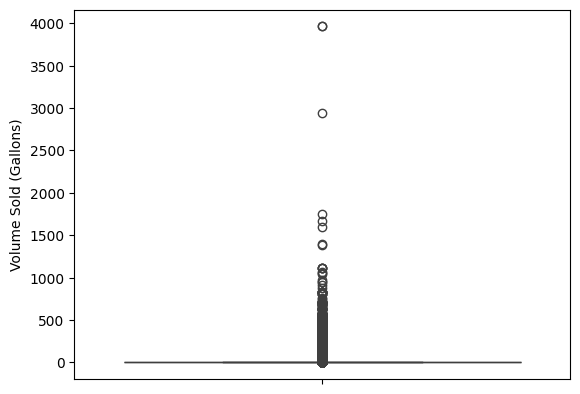

In [ ]:
sns.boxplot(df_cleaned['Bottles Sold'])

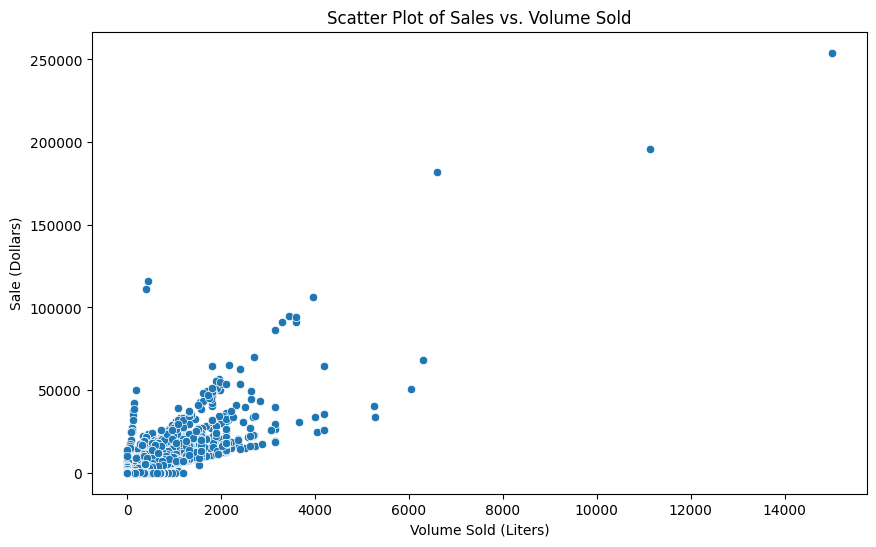

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume Sold (Liters)', y='Sale (Dollars)', data=df_cleaned)
plt.title('Scatter Plot of Sales vs. Volume Sold')
plt.show()

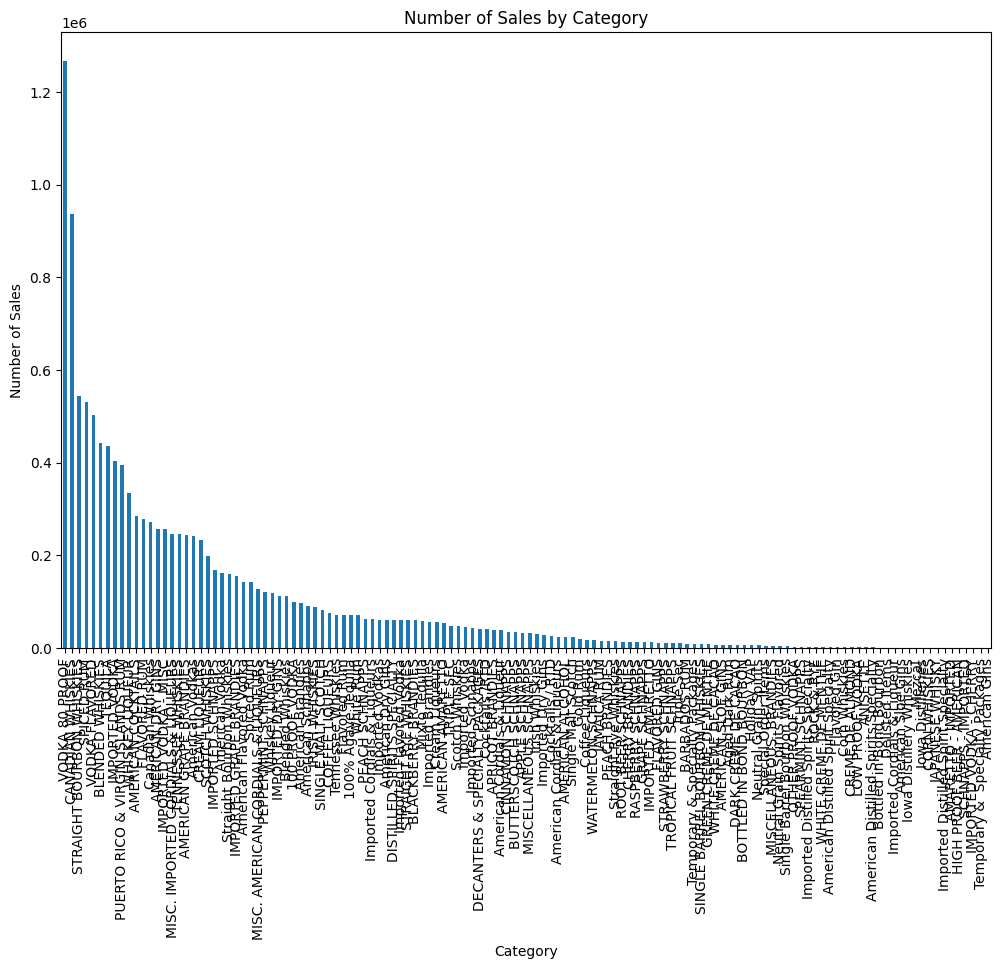

In [ ]:
category_counts = df_cleaned['Category Name'].value_counts()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Number of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()

In [ ]:
grouped_date = df_cleaned.groupby(by= ['Date','City'])

In [ ]:
len(grouped_date.groups)

104031

In [ ]:
grouped_date.first()

Invoice/Item Number  Store Number  \
Date       City                                                
2012-01-03 ALDEN                  S03391100017          4172   
           ALLISON                S03390100004          4571   
           ALTOONA                S03386500021          2548   
           AMES                   S03377200004          4438   
           ANAMOSA                S03383600024          3886   
...                                        ...           ...   
2017-10-31 Urbandale           INV-08351700001          5270   
           Wall Lake           INV-08356700001          5354   
           Waterloo            INV-08362600010          5474   
           Waukee              INV-08352300001          2665   
           West Des Moines     INV-08340600001          3814   

                                                      Store Name  \
Date       City                                                    
2012-01-03 ALDEN                                Shamrock Spirits   
           ALLISON          Casey's General Store #2357 / Alliso   
           ALTOONA                   Hy-Vee Food Store / Altoona   
           AMES                              Kum & Go #214  Ames   
           ANAMOSA                       Wal-Mart 0646 / Anamosa   
...                                                          ...   
2017-10-31 Urbandale        Casey's General Store # 2783/ Urband   
           Wall Lake                            Kimmes Wall Lake   
           Waterloo                             West Side Liquor   
           Waukee                                Hy-Vee / Waukee   
           West Des Moines                 Costco Wholesale #788   

                                             Address Zip Code  \
Date       City                                                 
2012-01-03 ALDEN            1204 WATER ST PO BOX 177    50006   
           ALLISON                    100, CHERRY ST    50602   
           ALTOONA                 100 8TH STREET SW    50009   
           AMES                         111 DUFF AVE    50010   
           ANAMOSA                       101  115 ST    52205   
...                                              ...      ...   
2017-10-31 Urbandale                    4901 86th St    50322   
           Wall Lake               129 Center Street    51466   
           Waterloo                     919 W 5th St    50702   
           Waukee                  1005 E Hickman Rd    50263   
           West Des Moines     7205 Mills Civic Pkwy    50266   

                                                               Store Location  \
Date       City                                                                 
2012-01-03 ALDEN            1204 WATER ST PO BOX 177\nALDEN 50006\n(42.520...   
           ALLISON          100, CHERRY ST\nALLISON 50602\n(42.745202, -92...   
           ALTOONA          100 8TH STREET SW\nALTOONA 50009\n(41.644041, ...   
           AMES             111 DUFF AVE\nAMES 50010\n(42.023592, -93.610396)   
           ANAMOSA          101 115 ST\nANAMOSA 52205\n(42.101677, -91.264...   
...                                                                       ...   
2017-10-31 Urbandale        4901 86th St\nUrbandale 50322\n(41.649717, -93...   
           Wall Lake        129 Center Street\nWall Lake 51466\n(42.271309...   
           Waterloo         919 W 5th St\nWaterloo 50702\n(42.488619, -92....   
           Waukee           1005 E Hickman Rd\nWaukee 50263\n(41.615059, -...   
           West Des Moines  7205 Mills Civic Pkwy\nWest Des Moines 50266\n...   

                            County Number      County   Category  \
Date       City                                                    
2012-01-03 ALDEN                     42.0      Hardin  1051110.0   
           ALLISON                   12.0      Butler  1011100.0   
           ALTOONA                   77.0        Polk  1032200.0   
           AMES                      85.0       Story  1051010.0   
 

In [ ]:
grouped_category = df_cleaned.groupby(by= ['Date','Category'])

In [ ]:
grouped_category.first()

Invoice/Item Number  Store Number  \
Date       Category                                      
2012-01-03 1011100.0        S03410300082          3495   
           1011200.0        S03411100022          3631   
           1011250.0        S03404600025          2205   
           1011300.0        S03389000022          3583   
           1011400.0        S03387800089          2191   
...                                  ...           ...   
2017-10-31 1092000.0     INV-08342200083          3385   
           1092100.0     INV-08346400103          5402   
           1701100.0     INV-08338100002          3644   
           1701200.0     INV-08338100001          3644   
           1901200.0     INV-08343700001          2622   

                                          Store Name  \
Date       Category                                    
2012-01-03 1011100.0                  Great Pastimes   
           1011200.0              Audubon Food Pride   
           1011250.0          Ding's Honk And Holler   
           1011300.0         Mac's Liquor And Videos   
           1011400.0                  Keokuk Spirits   
...                                              ...   
2017-10-31 1092000.0  Sam's Club 8162 / Cedar Rapids   
           1092100.0                     City Liquor   
           1701100.0         Wal-Mart 2764 / Altoona   
           1701200.0         Wal-Mart 2764 / Altoona   
           1901200.0   Hy-Vee Food Store / Iowa City   

                                       Address          City Zip Code  \
Date       Category                                                     
2012-01-03 1011100.0             228 N MAIN ST    MONTICELLO    52310   
           1011200.0  104 MARKET ST PO BOX 206       AUDUBON    50025   
           1011250.0          900 E WASHINGTON      CLARINDA    51632   
           1011300.0        220 EAST JEFFERSON       CORYDON    50060   
           1011400.0                 1013 MAIN        KEOKUK    52632   
...                                        ...           ...      ...   
2017-10-31 1092000.0   2605 Blairs Ferry Rd NE  Cedar Rapids    52402   
           1092100.0      425 S Gilbert Street     Iowa City    52240   
           1701100.0           3501  8th St SW       Altoona    50009   
           1701200.0           3501  8th St SW       Altoona    50009   
           1901200.0           1125 N Dodge St     Iowa City    52240   

                                                         Store Location  \
Date       Category                                                       
2012-01-03 1011100.0  228 N MAIN ST\nMONTICELLO 52310\n(42.240132, -...   
           1011200.0  104 MARKET ST PO BOX 206\nAUDUBON 50025\n(41.7...   
           1011250.0  900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...   
           1011300.0  220 EAST JEFFERSON\nCORYDON 50060\n(40.75718, ...   
           1011400.0    1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)   
...                                                                 ...   
2017-10-31 1092000.0  2605 Blairs Ferry Rd NE\nCedar Rapids 52402\n(...   
           1092100.0  425 S Gilbert Street\nIowa City 52240\n(41.656...   
           1701100.0  3501 8th St SW\nAltoona 50009\n(41.644195, -93...   
           1701200.0  3501 8th St SW\nAltoona 50009\n(41.644195, -93...   
           1901200.0  1125 N Dodge St\nIowa City 52240\n(41.676203, ...   

                      County Number   County  \
Date       Category                            
2012-01-03 1011100.0           53.0    Jones   
           1011200.0            5.0  Audubon   
           1011250.0           73.0     Page   
           1011300.0           93.0    Wayne   
           1011400.0           56.0      Lee   
...                             ...      ...   
2017-10-31 1092000.0           57.0     LINN   
           1092100.0           52.0  JOHNSON   
           1701100.0           77.0     POLK   
           1701200.0           77.0     POLK   
           1901200.0           52.0